# **📊 Basic Analysis**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATE_FILE = '2023-03-10' # Format YYYY-MM-DD
DATA_PATH = f"data/processed/{DATE_FILE}_istdaten_cleaned.parquet"
transport_data = pd.read_parquet(DATA_PATH)

OPERATORS_DATA_PATH = f"data/processed/{DATE_FILE}_operators.csv"
operators = pd.read_csv(OPERATORS_DATA_PATH)

In [3]:
transport_data.head()

,date,trip_id,product_id,line_text,transport_type,is_additional_trip,is_cancelled,stop_id,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip,stop_lon,stop_lat,stop_name
0,2023-03-10,80:800631:17230:000,Train,RB,RB,False,False,8500090,2023-03-10 04:59:00,2023-03-10 04:59:00,FORECAST,NaT,NaT,NaN,False,2612665,1268525,Basel Bad Bf
1,2023-03-10,80:800631:17233:000,Train,RB,RB,False,False,8500090,NaT,NaT,NaN,2023-03-10 06:07:00,2023-03-10 06:07:00,FORECAST,False,2612665,1268525,Basel Bad Bf
3,2023-03-10,80:800631:17235:000,Train,RB,RB,False,False,8500090,NaT,NaT,NaN,2023-03-10 06:43:00,2023-03-10 06:43:00,FORECAST,False,2612665,1268525,Basel Bad Bf
4,2023-03-10,80:800631:17236:000,Train,RB,RB,False,False,8500090,2023-03-10 06:33:00,2023-03-10 06:37:00,FORECAST,NaT,NaT,NaN,False,2612665,1268525,Basel Bad Bf
5,2023-03-10,80:800631:17237:000,Train,RB,RB,False,False,8500090,NaT,NaT,NaN,2023-03-10 07:15:00,2023-03-10 07:15:00,FORECAST,False,2612665,1268525,Basel Bad Bf


In [4]:
operators.head()

,operator_id,operator_abbreviation,operator_name
0,80:800631,DB,DB Regio AG Baden-Württemberg
1,80:800693,DB Regio,DB ZugBus Regionalverkehr Alb-Bodensee
2,80:80____,DB,DB Fernverkehr AG
3,80:sbg034,sbg034,sbg034
4,81:817000,NeTS-ÖBB,NeTS Planung ÖBB


In [5]:
def get_operator_id(row):
    trip_id = row['trip_id']
    operator_id = ':'.join(trip_id.split(':')[:2])
    return operator_id

transport_data = transport_data.assign(operator_id=transport_data.apply(get_operator_id, axis=1))
transport_data = transport_data.merge(operators, on='operator_id')
transport_data.head()

,date,trip_id,product_id,line_text,transport_type,is_additional_trip,is_cancelled,stop_id,arrival_time,arrival_forecast,...,departure_time,departure_forecast,departure_forecast_status,is_through_trip,stop_lon,stop_lat,stop_name,operator_id,operator_abbreviation,operator_name
0,2023-03-10,80:800631:17230:000,Train,RB,RB,False,False,8500090,2023-03-10 04:59:00,2023-03-10 04:59:00,...,NaT,NaT,NaN,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg
1,2023-03-10,80:800631:17233:000,Train,RB,RB,False,False,8500090,NaT,NaT,...,2023-03-10 06:07:00,2023-03-10 06:07:00,FORECAST,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg
2,2023-03-10,80:800631:17235:000,Train,RB,RB,False,False,8500090,NaT,NaT,...,2023-03-10 06:43:00,2023-03-10 06:43:00,FORECAST,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg
3,2023-03-10,80:800631:17236:000,Train,RB,RB,False,False,8500090,2023-03-10 06:33:00,2023-03-10 06:37:00,...,NaT,NaT,NaN,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg
4,2023-03-10,80:800631:17237:000,Train,RB,RB,False,False,8500090,NaT,NaT,...,2023-03-10 07:15:00,2023-03-10 07:15:00,FORECAST,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg


In [6]:
N_COLORS = 5 
palette = sns.color_palette('colorblind', n_colors=N_COLORS)
palette

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844)]

In [7]:
product_to_color = dict(zip(['Bus', 'Train', 'Tram', 'Metro', 'Rack_railway'], palette))

## **🎫 Swiss Transport Products Popularity**

In this section, we examine the popularity of various Swiss transport products based on the number of entries.

In [8]:
products = transport_data[['trip_id', 'product_id']] \
    .drop_duplicates() \
    .groupby('product_id') \
    .count() \
    .rename(columns={'trip_id': 'count'}) \
    .sort_values('count', ascending=False)

products.head()

,count
product_id,
Bus,113966
Train,13536
Tram,11131
Metro,357
Rack_railway,181


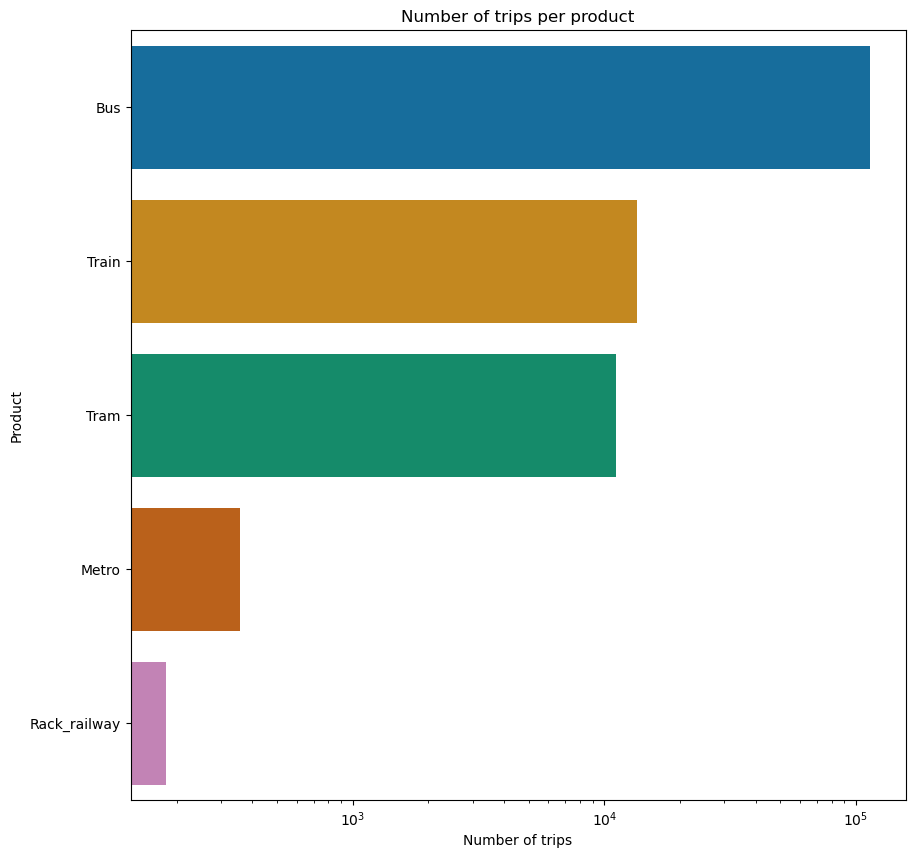

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='count', 
            y=products.index, 
            data=products, 
            ax=ax, 
            order=products.index, 
            palette=product_to_color
)
ax.set_title('Number of trips per product')
ax.set_xlabel('Number of trips')
ax.set_ylabel('Product')
plt.xscale('log')
plt.show()

The Swiss transport products analysis highlights the popularity of buses, which can be attributed to their extensive coverage, flexibility, and cost-effectiveness. Trains follow as the next most popular mode, offering efficiency and speed for longer distances. Trams and metro systems cater to urban commuters, while rack railways serve passengers in mountainous areas. This diverse range of transport options ensures a comprehensive and reliable public transportation network in Switzerland.

## **🚆 Types of Transports in Swiss Railways**

In this section, we investigate the types of transports within the Swiss railway system. Every product in the Swiss railway system is classified into multiple transport types.

In [10]:
transport_types = transport_data[['trip_id', 'transport_type']] \
    .drop_duplicates() \
    .groupby('transport_type') \
    .count() \
    .rename(columns={'trip_id': 'count'}) \
    .sort_values('count', ascending=False)

transport_types.head()

,count
transport_type,
B,113919
T,11131
S,8079
R,2525
RE,1133


In [11]:
transport_types_by_product_id = transport_data[['trip_id', 'transport_type', 'product_id']] \
    .drop_duplicates() \
    .groupby(['transport_type', 'product_id']) \
    .count() \
    .rename(columns={'trip_id': 'count'}) \
    .reset_index() \
    .sort_values('count', ascending=False)
transport_types_by_product_id = transport_types_by_product_id[transport_types_by_product_id['count'] > 0]

assert transport_types_by_product_id.set_index('transport_type').index.is_unique

# Merge the products and transport_types_by_product_id dataframes
transport_types_by_product_id = transport_types_by_product_id.merge(
    products.reset_index(), on='product_id', suffixes=('_transport_type', '_product')
)

# Sort the data by product and transport type counts
transport_types_by_product_id = transport_types_by_product_id.sort_values(
    ['count_product', 'count_transport_type'], ascending=[False, False]
)

transport_types_by_product_id.head()

,transport_type,product_id,count_transport_type,count_product
0,B,Bus,113919,113966
1,EXB,Bus,24,113966
2,CAR,Bus,23,113966
4,S,Train,8079,13536
5,R,Train,2525,13536


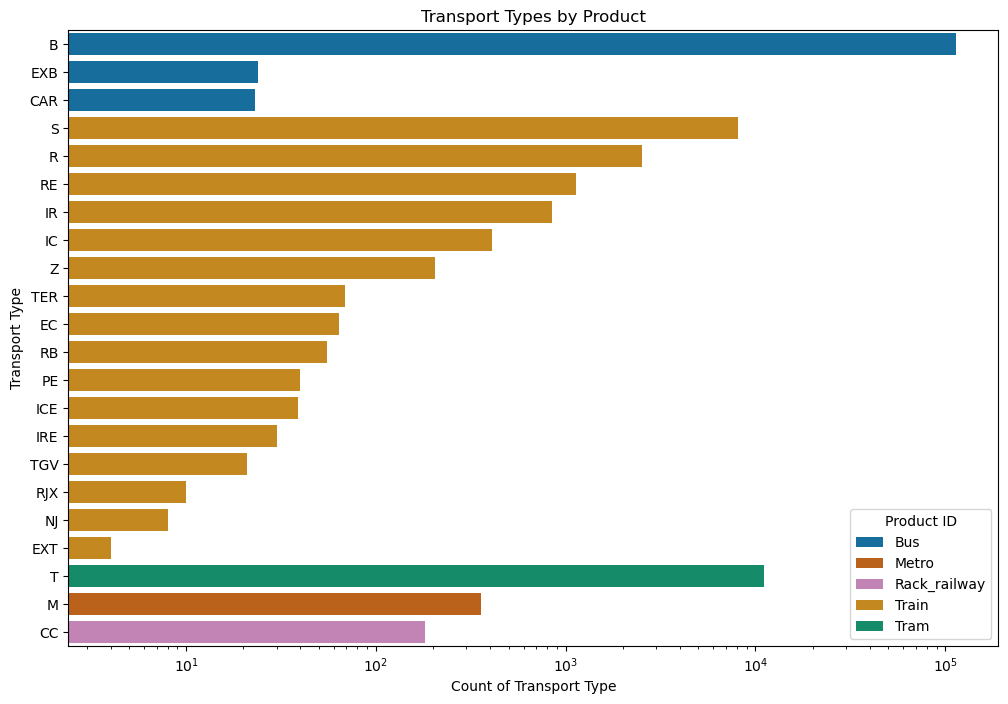

In [12]:
# Create the seaborn horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='count_transport_type',
    y='transport_type',
    hue='product_id',
    data=transport_types_by_product_id,
    orient='h',
    dodge=False,
    order=transport_types_by_product_id['transport_type'].unique(),
    palette=product_to_color
)

# Customize the plot
plt.xlabel('Count of Transport Type')
plt.ylabel('Transport Type')
plt.title('Transport Types by Product')
plt.legend(title='Product ID', loc='lower right')
plt.xscale('log')

# Display the plot
plt.show()

Trains are divided in $16$ different transport types each having significantly different number of entries.

## **🛑 Cancelled Journeys**

In this section, we focus on examining the number of cancelled entries. We check the operator with the highest number of cancelled entries for the day.

In [13]:
cancelled_data = transport_data[transport_data['is_cancelled']]
print(f"Number of cancelled entries: {len(cancelled_data)}")

Number of cancelled entries: 10671


In [14]:
cancelled_trips = transport_data[transport_data['is_cancelled']] \
    .groupby(['product_id', 'transport_type']) \
    .agg({'trip_id': 'count'}) \
    .rename(columns={'trip_id': 'count'}) \
    .reset_index() \
    .sort_values('count', ascending=False)
cancelled_trips = cancelled_trips[cancelled_trips['count'] > 0]

cancelled_trips.head()

,product_id,transport_type,count
0,Bus,B,6026
106,Tram,T,4642
1,Bus,CAR,3


In [15]:
# Get the entries of the Bus operator with the most cancelled trips on that day
cancelled_B_trips = transport_data[transport_data['is_cancelled'] & (transport_data['transport_type'] == 'B')]
most_cancelled_B_trips = cancelled_B_trips['operator_name'] \
    .value_counts() \
    .head(1) \
    .index[0]
cancelled_B_trips_VBZ = cancelled_B_trips[cancelled_B_trips['operator_name'] == most_cancelled_B_trips]

# Compute the ratio of cancelled trips for the Bus operator
B_trips_VBZ = transport_data[(transport_data['transport_type'] == 'B') & (transport_data['operator_name'] == most_cancelled_B_trips)]
ratio_cancelled_B_trips_VBZ = len(cancelled_B_trips_VBZ) / len(B_trips_VBZ)
print(f"Ratio of cancelled entries for the Bus operator {most_cancelled_B_trips}: {ratio_cancelled_B_trips_VBZ:.2%}")

Ratio of cancelled entries for the Bus operator Verkehrsbetriebe Zürich: 1.89%


On that day, approximately $1.9\%$ of the scheduled stops for the _Verkehrsbetriebe Zürich_ operator did not have a bus arriving.

## **⌚ Punctuality of Swiss Railways**

In this section, we focus on evaluating the delays in both arrival and departure times.

In [16]:
# We add a new column to the datafram that contains the delay in minutes
transport_data["arrival_delay"] = (transport_data["arrival_forecast"] - transport_data["arrival_time"]).dt.total_seconds() / 60
transport_data["departure_delay"] = (transport_data["departure_forecast"] - transport_data["departure_time"]).dt.total_seconds() / 60

transport_data[['arrival_delay', 'departure_delay']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

transport_data.head()

,date,trip_id,product_id,line_text,transport_type,is_additional_trip,is_cancelled,stop_id,arrival_time,arrival_forecast,...,departure_forecast_status,is_through_trip,stop_lon,stop_lat,stop_name,operator_id,operator_abbreviation,operator_name,arrival_delay,departure_delay
0,2023-03-10,80:800631:17230:000,Train,RB,RB,False,False,8500090,2023-03-10 04:59:00,2023-03-10 04:59:00,...,NaN,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg,0.0,NaN
1,2023-03-10,80:800631:17233:000,Train,RB,RB,False,False,8500090,NaT,NaT,...,FORECAST,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg,NaN,0.0
2,2023-03-10,80:800631:17235:000,Train,RB,RB,False,False,8500090,NaT,NaT,...,FORECAST,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg,NaN,0.0
3,2023-03-10,80:800631:17236:000,Train,RB,RB,False,False,8500090,2023-03-10 06:33:00,2023-03-10 06:37:00,...,NaN,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg,4.0,NaN
4,2023-03-10,80:800631:17237:000,Train,RB,RB,False,False,8500090,NaT,NaT,...,FORECAST,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg,NaN,0.0


In [17]:
transport_data[['arrival_delay', 'departure_delay']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,arrival_delay,departure_delay
count,2170604.00000,2170418.00000
mean,1.41408,1.60953
std,5.57046,5.55495
min,-1442.01667,-1439.85000
25%,0.36667,0.53333
50%,1.08333,1.23333
75%,2.05000,2.20000
max,718.68333,718.68333


### **🛬 Arrival Delays**

<Axes: title={'center': 'Histogram of arrival delays'}, xlabel='arrival_delay', ylabel='Count'>

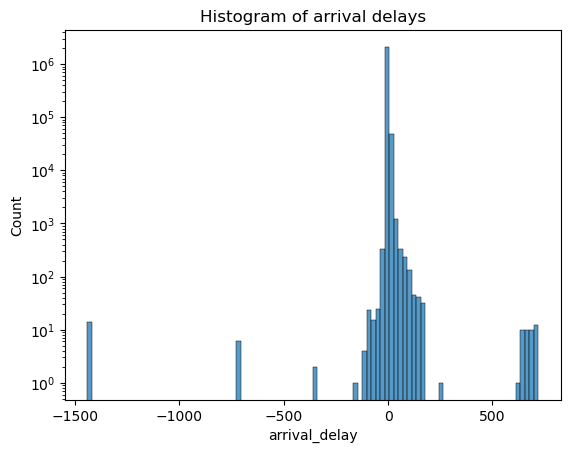

In [18]:
# This histogram corresponds to the delays in minutes for each arrival of each line
plt.title("Histogram of arrival delays")
sns.histplot(data=transport_data, x="arrival_delay", bins=100, log_scale=(False, True))

<Axes: title={'center': 'Histogram of arrival delays (within 200 minutes)'}, xlabel='arrival_delay', ylabel='Count'>

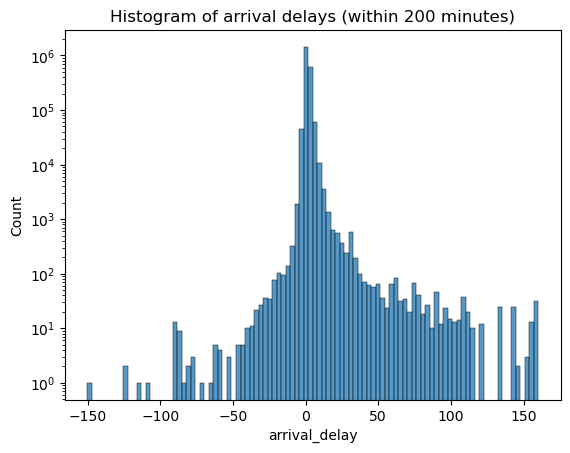

In [19]:
# This histogram corresponds to the delays in minutes for each departure of each line (we remove the outliers)
MAX_DELAY = 200

plt.title(f"Histogram of arrival delays (within {MAX_DELAY} minutes)")
sns.histplot(data=transport_data[(transport_data["arrival_delay"] > -MAX_DELAY) & (transport_data["arrival_delay"] < MAX_DELAY)], x="arrival_delay", bins=100, log_scale=(False, True))

The asymmetric Laplace distribution in the late train histogram can be attributed to efforts by train operators to minimize delays and the natural limit on early arrivals, leading to a quicker decline on the left side. On the right side, unpredictable factors such as equipment malfunctions, weather disruptions, and human errors can result in a wider spread of delays.

### **🛫 Departure Delays**

<Axes: title={'center': 'Histogram of departure delays (witin 200 minutes)'}, xlabel='departure_delay', ylabel='Count'>

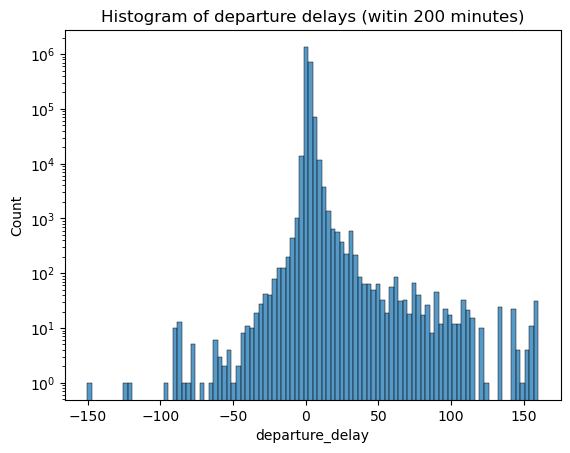

In [37]:
# This histogram corresponds to the delays in minutes for each departure of each line (we remove the outliers)
plt.title(f"Histogram of departure delays (witin {MAX_DELAY} minutes)")
sns.histplot(data=transport_data[(transport_data["departure_delay"] > -MAX_DELAY) & (transport_data["departure_delay"] < MAX_DELAY)], x="departure_delay", bins=100, log_scale=(False, True))

Departure and arrival delays look similar because they share common underlying factors that contribute to disruptions in train schedules.

## **🏅 Comparing Operators in Swiss Railways**

In this section, we present the top $10$ operators in terms of their punctuality in both arrival and departure times.

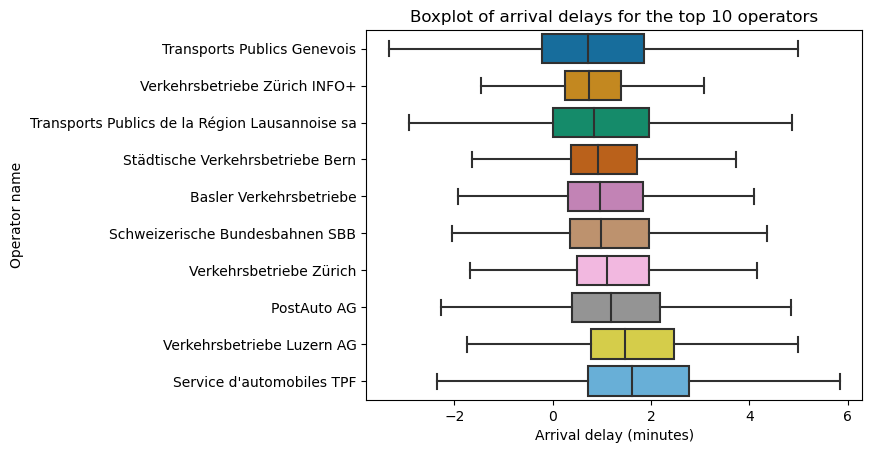

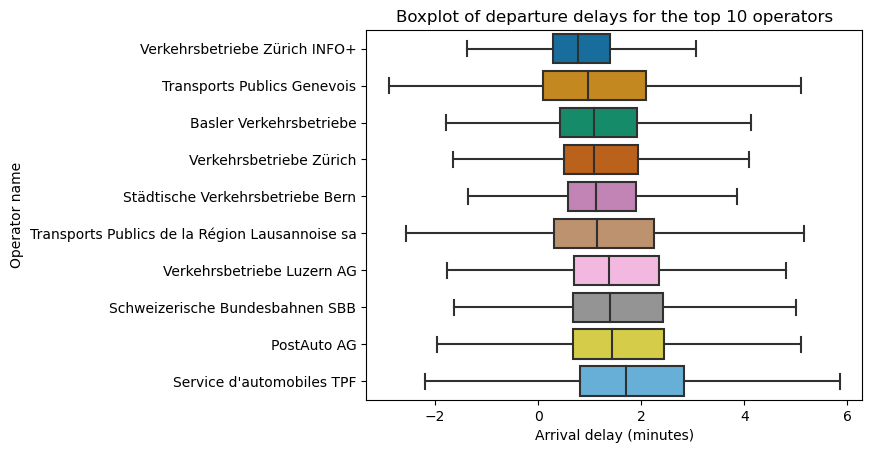

In [45]:
counts = transport_data.groupby('operator_name')['transport_type'].count().sort_values(ascending=False)[:10]
top_operators = transport_data[transport_data['operator_name'].isin(counts.index)]

# Get the mean arrival delay for each operator
median_arrival_delay = top_operators.groupby('operator_name')['arrival_delay'].median().sort_values()

# Set the order of the boxplot based on the mean arrival delay
boxplot_order = median_arrival_delay.index.tolist()

plt.title("Boxplot of arrival delays for the top 10 operators")
sns.boxplot(x='arrival_delay', y='operator_name', data=top_operators, showfliers=False, order=boxplot_order, palette='colorblind')
plt.xlabel("Arrival delay (minutes)")
plt.ylabel("Operator name")
plt.show()

# Get the mean departure delay for each operator
median_departure_delay = top_operators.groupby('operator_name')['departure_delay'].median().sort_values()

# Set the order of the boxplot based on the mean arrival delay
boxplot_order = median_departure_delay.index.tolist()


plt.title("Boxplot of departure delays for the top 10 operators")
sns.boxplot(x='departure_delay', y='operator_name', data=top_operators, showfliers=False, order=boxplot_order, palette='colorblind')
plt.xlabel("Arrival delay (minutes)")
plt.ylabel("Operator name")
plt.show()

## **🚉 Identifying High-Traffic Areas**

In this section, we focus on identifying the high-traffic areas in Switzerland. We use the number of entries as a proxy for traffic.

In [46]:
# Group the data by line_text and stop_name and count the number of rows in each group
grouped_data = transport_data.groupby(['line_text', 'stop_name']).size().reset_index(name='count')

# Sort the data by count in descending order
sorted_data = grouped_data.sort_values('count', ascending=False)

In [47]:
# Print the top 20 busiest lines and stops
sorted_data.head(20)

,line_text,stop_name,count
754903,13,"Zürich, Escher-Wyss-Platz",588
22532,10,"Bern, Bahnhof",534
22670,10,"Bern, Viktoriaplatz",529
22636,10,"Bern, Rosengarten",529
22639,10,"Bern, Salem",529
22648,10,"Bern, Schönburg",529
22646,10,"Bern, Schosshaldenfriedhof",528
22574,10,"Bern, Galgenfeld",528
34275,10,"Ostermundigen, Waldeck",528
34263,10,"Ostermundigen, Bahnhof",528


The busiest line-stop pair is _Zürich, Escher-Wyss-Platz_ with line $13$ that goes through the station $588$ times.

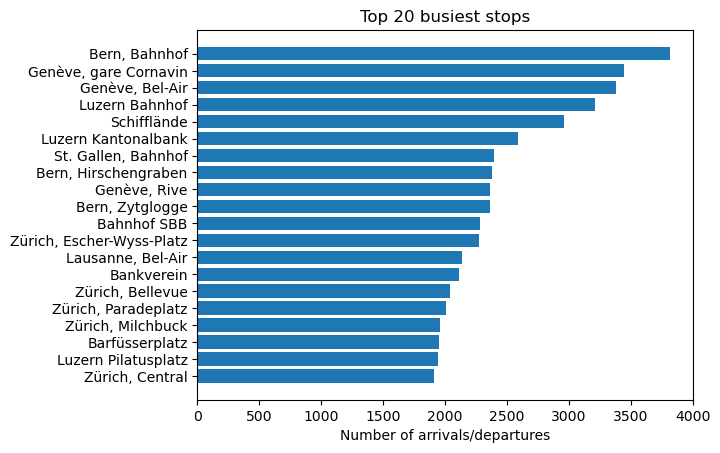

In [ ]:
# Do the same but just to find the buisiest stop
grouped_data = transport_data.groupby(['stop_name']).size().reset_index(name='count')
sorted_data = grouped_data.sort_values('count', ascending=False)
sorted_data.head(20)

plt.barh(sorted_data['stop_name'].iloc[:20], sorted_data['count'].iloc[:20])
plt.gca().invert_yaxis()
plt.xlabel("Number of arrivals/departures")
plt.title("Top 20 busiest stops")
plt.show()

The busiest stop is _Bern, Bahnhof_, followed by _Genève, gare Cornavin_.

## **🕒 Identifying Rush Hour in Swiss Railways**

In this section, we focus on identifying the rush hour in Swiss transport systems.

In [58]:
transport_data['arrival_hour'] = transport_data['arrival_time'].dt.hour

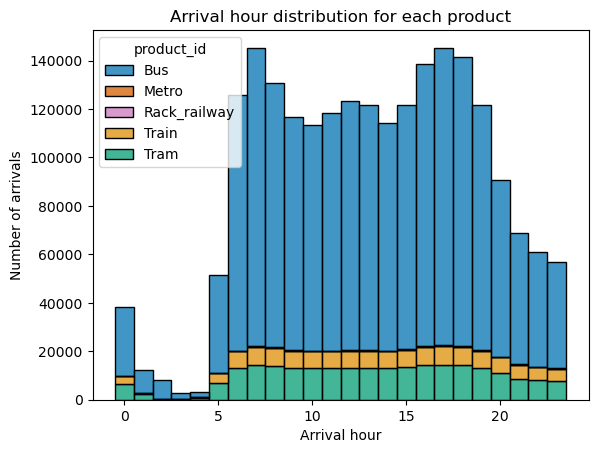

In [69]:
sns.histplot(data=transport_data, 
             x="arrival_hour", 
             bins=24, 
             hue="product_id", 
             multiple="stack", 
             palette=product_to_color,
             discrete=True,
)
plt.title("Arrival hour distribution for each product")
plt.xlabel("Arrival hour")
plt.ylabel("Number of arrivals")
plt.show()

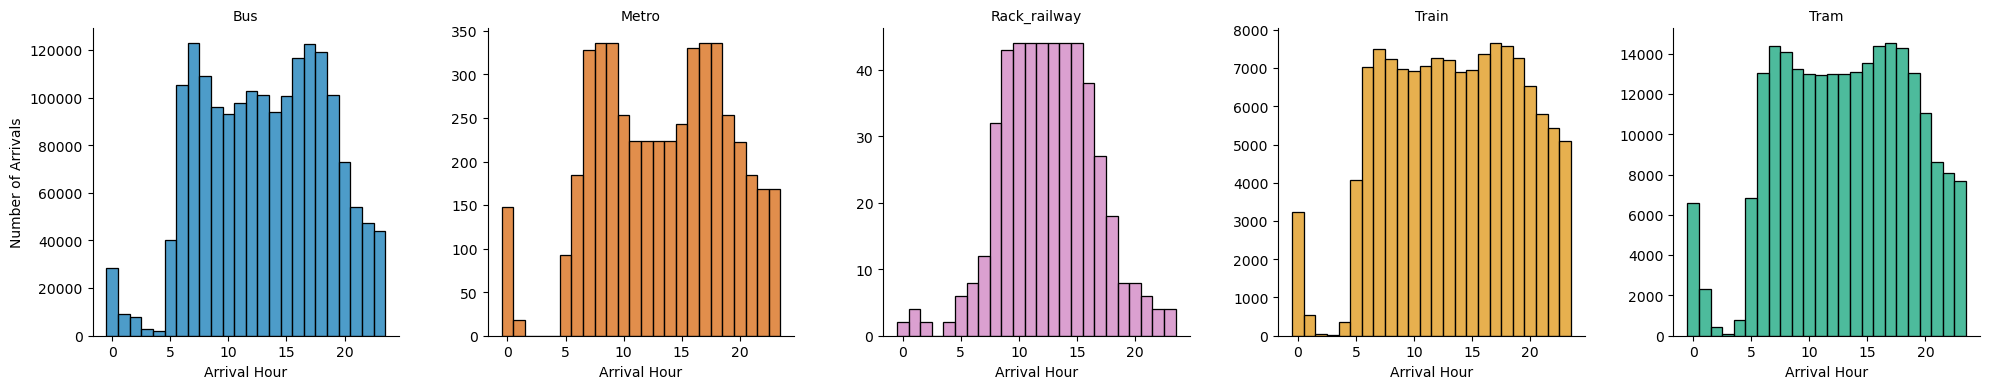

In [72]:
# Get the unique product_ids
unique_product_ids = transport_data['product_id'].unique()

# Create a FacetGrid with one row and a column for each product_id
g = sns.FacetGrid(transport_data, 
                  col="product_id", 
                  col_wrap=len(unique_product_ids), 
                  hue='product_id', 
                  palette=product_to_color, 
                  height=4, 
                  aspect=1,
                  sharey=False,
)

# Map the histplot function to each subplot
g.map(sns.histplot, 'arrival_hour', bins=24, discrete=True, alpha=0.7)

# Set the titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Arrival Hour", "Number of Arrivals")

# Show the plot
plt.show()

We can clearly see the peak hours in the graph above. The peak hours are $6:00$ to $8:00$ and $16:00$ to $18:00$. The rack railway is more consistent throughout the day.

## **📍 Investigating Delays at Train Stops**

In this section, we investingate on finding the stations with the most delays.

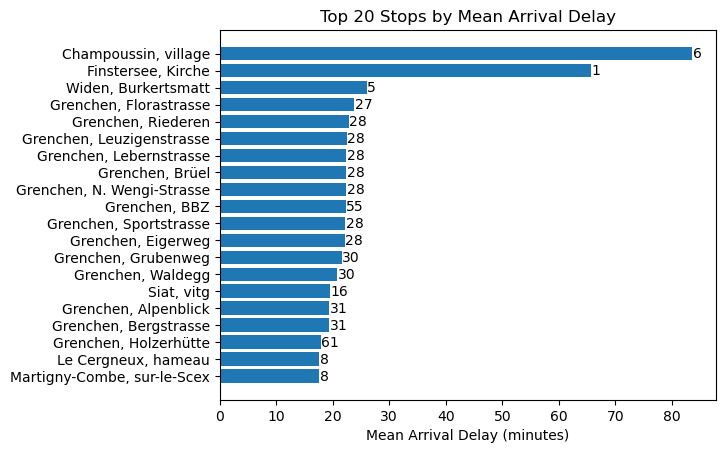

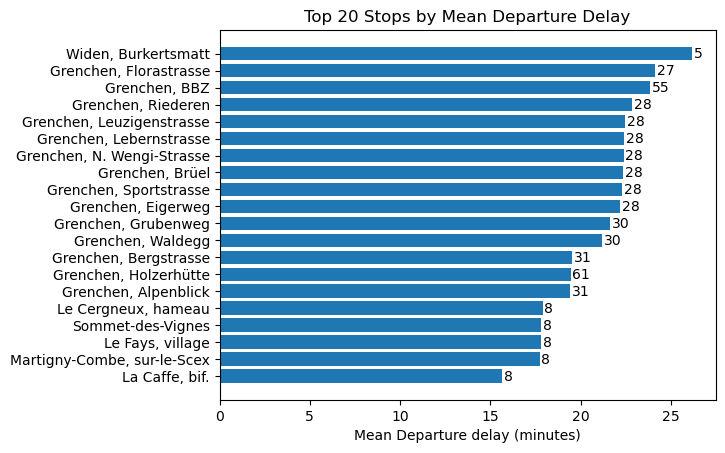

In [56]:
# Group the data by stop_name, calculate the mean arrival and departure delay, and count the entries for each stop
stop_delays = transport_data.groupby('stop_name').agg({'arrival_delay': 'mean', 'departure_delay': 'mean', 'stop_id': 'count'})
stop_delays.rename(columns={'stop_id': 'count'}, inplace=True)

# Sort the data by the mean arrival delay in descending order
sorted_stops = stop_delays.sort_values('arrival_delay', ascending=False)

# Plot the top 20 stops by mean arrival delay
bars = plt.barh(sorted_stops.index[:20], sorted_stops['arrival_delay'][:20], align='center')
plt.gca().invert_yaxis()
plt.xlabel('Mean Arrival Delay (minutes)')
plt.title('Top 20 Stops by Mean Arrival Delay')

# Annotate bars with entry counts
for i, bar in enumerate(bars):
    plt.gca().text(bar.get_width() + 0.1, bar.get_y() + 0.65, f'{int(sorted_stops.iloc[i]["count"])}', fontsize=10)

plt.show()

# Sort the data by the mean departure delay in descending order
sorted_stops = stop_delays.sort_values('departure_delay', ascending=False)

# Plot the top 20 stops by mean departure delay
bars = plt.barh(sorted_stops.index[:20], sorted_stops['departure_delay'][:20], align='center')
plt.gca().invert_yaxis()
plt.xlabel('Mean Departure delay (minutes)')
plt.title('Top 20 Stops by Mean Departure Delay')

# Annotate bars with entry counts
for i, bar in enumerate(bars):
    plt.gca().text(bar.get_width() + 0.1, bar.get_y() + 0.65, f'{int(sorted_stops.iloc[i]["count"])}', fontsize=10)

plt.show()

These graphs show the mean delay for each stop, with the number of entries taken into account for each stop. _Champoussin_ was not lucky that day, with a mean arrival delay of about $80$ minutes.